# Geolocalisation of Planet data

In [14]:
# Setup code for the notebook
%matplotlib notebook
# Autoreload external python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from ipytools import display_imshow
from ipytools import readGTIFF
from ipytools import writeGTIFF
from ipytools import readGTIFFmeta
from ipytools import display_gallery
from ipytools import display_RSO
from ipytools import overlaymap

from glob import glob
from tqdm import tqdm
import json
import numpy as np

# RPC class
from rpc_model import RPCModel

# Tools to handle S03
from tools import s03_handler
from tools import data_handler
from tools import get_image_longlat_polygon
from tools import reprojection
from tools import geolocalisation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
lst_tif, area, triplets = s03_handler()

In [3]:
lst_tif

['../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0008.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0014.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d3_0014.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0002.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0018.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0010.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0002.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0005.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0017.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0011.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0004.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0004.tif',
 '..

In [4]:
area

{'d1': {1: {'1Z': '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0001.tif',
   '7Z': '../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d1_0001.tif',
   '8Z': '../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d1_0001.tif'},
  2: {'1Z': '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0002.tif',
   '7Z': '../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d1_0002.tif',
   '8Z': '../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d1_0002.tif'},
  3: {'1Z': '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0003.tif',
   '7Z': '../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d1_0003.tif',
   '8Z': '../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d1_0003.tif'},
  4: {'1Z': '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0004.tif',
   '7Z': '../data/s03_20161003T161107Z/panchromatic/s03_20161003T1611

In [5]:
triplets

{'1Z': {'d1': {1: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0001.tif',
   2: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0002.tif',
   3: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0003.tif',
   4: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0004.tif',
   5: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0005.tif',
   6: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0006.tif',
   7: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0007.tif',
   8: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0008.tif',
   9: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0009.tif',
   10: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0010.tif',
   11: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0011.tif',
   12: '../data/s0

# S03

In [6]:
from ipytools import clickablemap

In [7]:
# these lines create a map objet and display it
m = clickablemap(zoom=14)
display(m)

# we can move the map to any position by indicating its (latitude, longitude)
m.center = [35.96134549, -96.7190739]   # i.e. Cushing USA

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[48.790153, 2.327395], controls=(DrawControl(circle={'shapeOptions': {'color': '#0000FF'}}, layer=FeatureGroup(), polygon={'shapeOptions': {'color': '#0000FF'}}, polyline={'shapeOptions': {'color': '#0000FF'}}, rectangle={'shapeOptions': {'color': '#0000FF'}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']),), layout=Layout(height='500px', width='100%'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], scroll_wheel_zoom=True, zoom=14)

In [8]:
f_img = triplets['1Z']['d1'][1]
f_rpc = f_img.replace(".tif", "_rpc.txt")
f_rpc

'../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0001_rpc.txt'

In [9]:
rpc_f = RPCModel(triplets['1Z']['d1'][2].replace(".tif", "_rpc.txt"))
rpc_f


    # Projection function coefficients
      col_num = -0.0018  1.0424  0.0220 -0.0202 -0.0039  0.0033  0.0001 -0.0851 -0.0000 -0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
      col_den =  1.0000 -0.0824 -0.0011  0.0014 -0.0001  0.0000  0.0000  0.0001  0.0000 -0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
      row_num = -0.0015 -0.4367 -1.4931 -0.0566  0.2310  0.0088  0.0300  0.0337  0.3951  0.0006  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
      row_den =  1.0000 -0.0780 -0.2637 -0.0101  0.0001  0.0000  0.0000  0.0001 -0.0002  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000

    # Offsets and Scales
      row_offset = 674.5
      col_offset = 1599.5
      lat_offset = 36.05096386
      lon_offset = -96.72475481
      alt_offset = 282.0
      row_scale = 674.5
      col_scale = 1599.5
      lat_scale = 0.0092312
      lon_scal

In [10]:
rpc_f = RPCModel(triplets['1Z']['d1'][10].replace(".tif", "_rpc.txt"))
rpc_f


    # Projection function coefficients
      col_num = -0.0018  1.0424  0.0230 -0.0193 -0.0018  0.0012  0.0000 -0.0365  0.0000 -0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
      col_den =  1.0000 -0.0357  0.0001  0.0004 -0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
      row_num = -0.0016 -0.4502 -1.5096 -0.0596  0.1875  0.0074  0.0249  0.0279  0.3146  0.0005  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
      row_den =  1.0000 -0.0626 -0.2074 -0.0083  0.0001  0.0000  0.0000  0.0000 -0.0002  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000

    # Offsets and Scales
      row_offset = 674.5
      col_offset = 1599.5
      lat_offset = 35.96134549
      lon_offset = -96.7190739
      alt_offset = 282.0
      row_scale = 674.5
      col_scale = 1599.5
      lat_scale = 0.00966834
      lon_scal

In [41]:
geolocalisation(triplets['8Z']['d2']);

100%|██████████| 21/21 [00:02<00:00, 10.08it/s]


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[36.0922134930637, -96.7753867740955], controls=(DrawControl(circle={'shapeOptions': {'color': '#0000FF'}}, layer=FeatureGroup(), polygon={'shapeOptions': {'color': '#0000FF'}}, polyline={'shapeOptions': {'color': '#0000FF'}}, rectangle={'shapeOptions': {'color': '#0000FF'}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7753867740955, 36.0922134930637], [-96.741631380173, 36.0934777908426], [-96.7412157974791, 36.0834523542025], [-96.7749630970429, 36.0821627030972]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7747184246331, 36.0833965048915], [-96.7410184918645, 36.0845911607923], [-96.7406034733328, 36.0745752808472], [-96.7742950024563, 36.0733553898033]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7742438500235, 36.0745902181816], [-96.7405973844632, 36.0757155520438], [-96.7401830061956, 36.0657085932379], [-96.7738207584982, 36.0645581366946]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7736978730073, 36.0661862417086], [-96.7401042602394, 36.0672422916167], [-96.7396900789725, 36.0572438658106], [-96.773274661379, 36.0561628036363]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7730824567268, 36.0571075702518], [-96.7395412885412, 36.0580958322822], [-96.7391277838864, 36.0481054537106], [-96.7726596168236, 36.0470922862824]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7724574480455, 36.0484056960278], [-96.738966016171, 36.0493292791584], [-96.7385530539498, 36.0393461859494], [-96.7720348569702, 36.0383977974126]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7718823177173, 36.0397586100878], [-96.7384395060662, 36.040617964982], [-96.7380269598299, 36.0306416946574], [-96.7714598475651, 36.0297576308257]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7713032410236, 36.030886483387], [-96.7379099293849, 36.0316790270764], [-96.7374978639347, 36.0217093666384], [-96.7708809435692, 36.0208922108984]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7707033099282, 36.0221266308393], [-96.7373586871478, 36.0228529934027], [-96.7369467885878, 36.0128894802725], [-96.7702808682482, 36.0121385996264]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7701370762108, 36.0133376281965], [-96.7368400374386, 36.0139980611318], [-96.7364284426778, 36.0040401648595], [-96.7697146283437, 36.0033553040259]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7694342153465, 36.0044546172691], [-96.7361845851824, 36.0050494575385], [-96.7357734842633, 35.9950967867112], [-96.7690119533331, 35.9944776068343]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7689110826608, 35.9959525528874], [-96.735705356994, 35.9964849153712], [-96.7352945350557, 35.9865366753192], [-96.7684888031072, 35.9859800534683]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7682988057881, 35.9874323368854], [-96.7351366047472, 35.9879025454462], [-96.7347261123932, 35.9779583558561], [-96.7678765592821, 35.9774639661126]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7677857772144, 35.9789197628458], [-96.7346657343053, 35.9793284170317], [-96.7342554108159, 35.9693877613578], [-96.7673634018899, 35.96895500029]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7672279814459, 35.9704459678083], [-96.7341494675417, 35.9707932862571], [-96.7337393289996, 35.960855717559], [-96.7668054930942, 35.9604843639786]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7666928594023, 35.9620155232753], [-96.7336548860489, 35.9623022442858], [-96.7332446303422, 35.9523672960884], [-96.7662699537725, 35.9520566087872]]]}), GeoJSON(data={'type': 'Polygon', 'coord

# 8Z Trace

In [108]:
d1_8Z = geolocalisation(triplets['8Z']['d1']);

100%|██████████| 21/21 [00:02<00:00,  8.22it/s]


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[36.0630813277031, -96.7444506607542], controls=(DrawControl(circle={'shapeOptions': {'color': '#0000FF'}}, layer=FeatureGroup(), polygon={'shapeOptions': {'color': '#0000FF'}}, polyline={'shapeOptions': {'color': '#0000FF'}}, rectangle={'shapeOptions': {'color': '#0000FF'}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7444506607542, 36.0630813277031], [-96.710915579583, 36.0644312212303], [-96.7105193209155, 36.0544144796801], [-96.7440521904394, 36.053043341653]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7438327124788, 36.054232571186], [-96.7103531847947, 36.0555129418341], [-96.7099577502941, 36.0455062983971], [-96.7434347501331, 36.0442048112911]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7434069865466, 36.0453928907525], [-96.7099810580321, 36.0466040722434], [-96.7095865247295, 36.0366068857084], [-96.7430096096714, 36.0353747102562]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7429080157184, 36.0369544057404], [-96.7095351038615, 36.0380964402032], [-96.7091410365987, 36.0281083465126], [-96.7425107819575, 36.0269454389379]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7423406770175, 36.0278409839675], [-96.7090203452904, 36.0289153687826], [-96.7086272120223, 36.0189358438648], [-96.7419440665345, 36.0178407030089]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.741760975879, 36.019104854822], [-96.708490503908, 36.0201146943281], [-96.7080981616548, 36.0101429915787], [-96.7413648571444, 36.0091125059241]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7412297602473, 36.0104224929534], [-96.7080080699675, 36.0113682477017], [-96.7076163943803, 36.0014038749036], [-96.740834007931, 36.0004375805741]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7406955999893, 36.0015121740504], [-96.7075235787428, 36.0023912748909], [-96.7071326467794, 35.992434053222], [-96.7403002778574, 35.9915345203746]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7401389037441, 35.9927132846697], [-96.7070157763871, 35.9935263655693], [-96.7066252772157, 35.9835758365355], [-96.7397436983463, 35.9827424284294]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7396153455331, 35.9838838806417], [-96.7065399884079, 35.9846312011915], [-96.7061500583916, 35.9746868380522], [-96.7392203944837, 35.9739192914641]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7389556080908, 35.9749595883864], [-96.7059278494509, 35.975641486592], [-96.7055386765644, 35.965702916533], [-96.7385611018713, 35.9650008917097]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7384715749357, 35.9664175674124], [-96.7054879236499, 35.9670367095594], [-96.705099504655, 35.9571031062257], [-96.7380775244056, 35.9564639296532]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7378987671419, 35.9578545633911], [-96.7049588650267, 35.9584121803321], [-96.7045708118721, 35.948483180038], [-96.7375047785493, 35.9479056166872]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7374232303542, 35.94929911115], [-96.7045257378263, 35.9497953591912], [-96.7041381112628, 35.9398704115509], [-96.7370293668555, 35.9393543024373]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7369024366061, 35.9407813037919], [-96.7040467050894, 35.9412164049806], [-96.7036595213414, 35.9312951057474], [-96.7365087142845, 35.9308402265603]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7364025468739, 35.9323060713112], [-96.703587622938, 35.9326807693443], [-96.7032005828485, 35.9227626172427], [-96.7360086644386, 35.9223682213444]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates

In [105]:
d2_8Z = geolocalisation(triplets['8Z']['d2']);

100%|██████████| 21/21 [00:02<00:00,  8.00it/s]


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[36.0922134930637, -96.7753867740955], controls=(DrawControl(circle={'shapeOptions': {'color': '#0000FF'}}, layer=FeatureGroup(), polygon={'shapeOptions': {'color': '#0000FF'}}, polyline={'shapeOptions': {'color': '#0000FF'}}, rectangle={'shapeOptions': {'color': '#0000FF'}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7753867740955, 36.0922134930637], [-96.741631380173, 36.0934777908426], [-96.7412157974791, 36.0834523542025], [-96.7749630970429, 36.0821627030972]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7747184246331, 36.0833965048915], [-96.7410184918645, 36.0845911607923], [-96.7406034733328, 36.0745752808472], [-96.7742950024563, 36.0733553898033]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7742438500235, 36.0745902181816], [-96.7405973844632, 36.0757155520438], [-96.7401830061956, 36.0657085932379], [-96.7738207584982, 36.0645581366946]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7736978730073, 36.0661862417086], [-96.7401042602394, 36.0672422916167], [-96.7396900789725, 36.0572438658106], [-96.773274661379, 36.0561628036363]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7730824567268, 36.0571075702518], [-96.7395412885412, 36.0580958322822], [-96.7391277838864, 36.0481054537106], [-96.7726596168236, 36.0470922862824]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7724574480455, 36.0484056960278], [-96.738966016171, 36.0493292791584], [-96.7385530539498, 36.0393461859494], [-96.7720348569702, 36.0383977974126]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7718823177173, 36.0397586100878], [-96.7384395060662, 36.040617964982], [-96.7380269598299, 36.0306416946574], [-96.7714598475651, 36.0297576308257]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7713032410236, 36.030886483387], [-96.7379099293849, 36.0316790270764], [-96.7374978639347, 36.0217093666384], [-96.7708809435692, 36.0208922108984]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7707033099282, 36.0221266308393], [-96.7373586871478, 36.0228529934027], [-96.7369467885878, 36.0128894802725], [-96.7702808682482, 36.0121385996264]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7701370762108, 36.0133376281965], [-96.7368400374386, 36.0139980611318], [-96.7364284426778, 36.0040401648595], [-96.7697146283437, 36.0033553040259]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7694342153465, 36.0044546172691], [-96.7361845851824, 36.0050494575385], [-96.7357734842633, 35.9950967867112], [-96.7690119533331, 35.9944776068343]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7689110826608, 35.9959525528874], [-96.735705356994, 35.9964849153712], [-96.7352945350557, 35.9865366753192], [-96.7684888031072, 35.9859800534683]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7682988057881, 35.9874323368854], [-96.7351366047472, 35.9879025454462], [-96.7347261123932, 35.9779583558561], [-96.7678765592821, 35.9774639661126]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7677857772144, 35.9789197628458], [-96.7346657343053, 35.9793284170317], [-96.7342554108159, 35.9693877613578], [-96.7673634018899, 35.96895500029]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7672279814459, 35.9704459678083], [-96.7341494675417, 35.9707932862571], [-96.7337393289996, 35.960855717559], [-96.7668054930942, 35.9604843639786]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7666928594023, 35.9620155232753], [-96.7336548860489, 35.9623022442858], [-96.7332446303422, 35.9523672960884], [-96.7662699537725, 35.9520566087872]]]}), GeoJSON(data={'type': 'Polygon', 'coord

In [106]:
d3_8Z = geolocalisation(triplets['8Z']['d3']);

100%|██████████| 21/21 [00:02<00:00,  7.96it/s]


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[36.0598351045905, -96.8032203724742], controls=(DrawControl(circle={'shapeOptions': {'color': '#0000FF'}}, layer=FeatureGroup(), polygon={'shapeOptions': {'color': '#0000FF'}}, polyline={'shapeOptions': {'color': '#0000FF'}}, rectangle={'shapeOptions': {'color': '#0000FF'}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.8032203724742, 36.0598351045905], [-96.7693312717977, 36.0611577503507], [-96.7689577596278, 36.0510897774159], [-96.8028443678949, 36.0497448421934]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.8025036132175, 36.0511094187561], [-96.7686716945387, 36.0523616594586], [-96.7682984088273, 36.0423040958792], [-96.8021275121968, 36.0410296959372]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.8019825974765, 36.0423921598858], [-96.7682058270196, 36.0435743376426], [-96.7678328474204, 36.0335265310649], [-96.8016064803465, 36.0323223186745]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.801389288406, 36.0340759650538], [-96.7676670951458, 36.035188123289], [-96.7672939736138, 36.0251497111247], [-96.8010126997819, 36.0240156408858]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.8007284508455, 36.0250821788281], [-96.7670603770977, 36.0261258371377], [-96.7666876039945, 36.0160962785871], [-96.8003518935247, 36.0150308271727]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.8000600423151, 36.0164601496135], [-96.7664433064997, 36.0174384531115], [-96.7660707613205, 36.0074169844752], [-96.7996834075889, 36.0064169994646]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7994420733771, 36.0078910206012], [-96.7658755394159, 36.0088044361736], [-96.765503095905, 35.9987905719623], [-96.7990652338352, 35.9978555829786]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7988194953188, 35.9990984364447], [-96.7653041332309, 35.9999443668098], [-96.7649318456794, 35.9899379186551], [-96.7984424921032, 35.98907052385]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7981758153773, 35.9904161132142], [-96.7647107760986, 35.9911952000384], [-96.7643383287891, 35.9811957175337], [-96.7977983298871, 35.9803952724873]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7975672136909, 35.9817027683387], [-96.7641513889626, 35.9824152776078], [-96.7637789216816, 35.9724222207737], [-96.7971893869926, 35.9716884557527]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7968227189431, 35.9728939142888], [-96.7634559539169, 35.973540191875], [-96.7630836603306, 35.9635531586877], [-96.7964447477681, 35.9628857258469]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7962604223802, 35.9644607979613], [-96.7629390956115, 35.9650440002223], [-96.7625667734327, 35.955062181296], [-96.7958821151312, 35.9544579159209]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7956094679143, 35.956008043686], [-96.7623332198978, 35.9565285040613], [-96.7619609216223, 35.9465515012889], [-96.7952308779096, 35.9460100678408]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7950584318084, 35.947560724569], [-96.7618258753833, 35.9480190583316], [-96.7614534418008, 35.9380463500682], [-96.794679399112, 35.9375671294344]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7944632290575, 35.9391506445535], [-96.7612737338111, 35.9395470793816], [-96.7609011821835, 35.9295782270049], [-96.7940837706614, 35.929160989063]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7938906104707, 35.9307817702097], [-96.7607431876318, 35.9311170582996], [-96.760370215601, 35.9211515685809], [-96.7935104221303, 35.920795558174]]]}), GeoJSON(data={'type': 'Polygon', 'coordinat

In [109]:
d1_8Z

[{'coordinates': [[[-96.7444506607542, 36.0630813277031],
    [-96.710915579583, 36.0644312212303],
    [-96.7105193209155, 36.0544144796801],
    [-96.7440521904394, 36.053043341653]]],
  'type': 'Polygon'},
 {'coordinates': [[[-96.7438327124788, 36.054232571186],
    [-96.7103531847947, 36.0555129418341],
    [-96.7099577502941, 36.0455062983971],
    [-96.7434347501331, 36.0442048112911]]],
  'type': 'Polygon'},
 {'coordinates': [[[-96.7434069865466, 36.0453928907525],
    [-96.7099810580321, 36.0466040722434],
    [-96.7095865247295, 36.0366068857084],
    [-96.7430096096714, 36.0353747102562]]],
  'type': 'Polygon'},
 {'coordinates': [[[-96.7429080157184, 36.0369544057404],
    [-96.7095351038615, 36.0380964402032],
    [-96.7091410365987, 36.0281083465126],
    [-96.7425107819575, 36.0269454389379]]],
  'type': 'Polygon'},
 {'coordinates': [[[-96.7423406770175, 36.0278409839675],
    [-96.7090203452904, 36.0289153687826],
    [-96.7086272120223, 36.0189358438648],
    [-96.741944

In [112]:
import ipywidgets
m = clickablemap(layout = ipywidgets.Layout(width='100%', height='1500px'))

for i in range(18):
    m.add_GeoJSON(d1_8Z[i])
for i in range(18):
    m.add_GeoJSON(d2_8Z[i])
for i in range(18):
    m.add_GeoJSON(d3_8Z[i])

m.center = footprint[0]['coordinates'][0][0][::-1]

display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[36.1075931445452, -96.7811354160731], controls=(DrawControl(circle={'shapeOptions': {'color': '#0000FF'}}, layer=FeatureGroup(), polygon={'shapeOptions': {'color': '#0000FF'}}, polyline={'shapeOptions': {'color': '#0000FF'}}, rectangle={'shapeOptions': {'color': '#0000FF'}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7444506607542, 36.0630813277031], [-96.710915579583, 36.0644312212303], [-96.7105193209155, 36.0544144796801], [-96.7440521904394, 36.053043341653]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7438327124788, 36.054232571186], [-96.7103531847947, 36.0555129418341], [-96.7099577502941, 36.0455062983971], [-96.7434347501331, 36.0442048112911]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7434069865466, 36.0453928907525], [-96.7099810580321, 36.0466040722434], [-96.7095865247295, 36.0366068857084], [-96.7430096096714, 36.0353747102562]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7429080157184, 36.0369544057404], [-96.7095351038615, 36.0380964402032], [-96.7091410365987, 36.0281083465126], [-96.7425107819575, 36.0269454389379]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7423406770175, 36.0278409839675], [-96.7090203452904, 36.0289153687826], [-96.7086272120223, 36.0189358438648], [-96.7419440665345, 36.0178407030089]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.741760975879, 36.019104854822], [-96.708490503908, 36.0201146943281], [-96.7080981616548, 36.0101429915787], [-96.7413648571444, 36.0091125059241]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7412297602473, 36.0104224929534], [-96.7080080699675, 36.0113682477017], [-96.7076163943803, 36.0014038749036], [-96.740834007931, 36.0004375805741]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7406955999893, 36.0015121740504], [-96.7075235787428, 36.0023912748909], [-96.7071326467794, 35.992434053222], [-96.7403002778574, 35.9915345203746]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7401389037441, 35.9927132846697], [-96.7070157763871, 35.9935263655693], [-96.7066252772157, 35.9835758365355], [-96.7397436983463, 35.9827424284294]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7396153455331, 35.9838838806417], [-96.7065399884079, 35.9846312011915], [-96.7061500583916, 35.9746868380522], [-96.7392203944837, 35.9739192914641]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7389556080908, 35.9749595883864], [-96.7059278494509, 35.975641486592], [-96.7055386765644, 35.965702916533], [-96.7385611018713, 35.9650008917097]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7384715749357, 35.9664175674124], [-96.7054879236499, 35.9670367095594], [-96.705099504655, 35.9571031062257], [-96.7380775244056, 35.9564639296532]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7378987671419, 35.9578545633911], [-96.7049588650267, 35.9584121803321], [-96.7045708118721, 35.948483180038], [-96.7375047785493, 35.9479056166872]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7374232303542, 35.94929911115], [-96.7045257378263, 35.9497953591912], [-96.7041381112628, 35.9398704115509], [-96.7370293668555, 35.9393543024373]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7369024366061, 35.9407813037919], [-96.7040467050894, 35.9412164049806], [-96.7036595213414, 35.9312951057474], [-96.7365087142845, 35.9308402265603]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7364025468739, 35.9323060713112], [-96.703587622938, 35.9326807693443], [-96.7032005828485, 35.9227626172427], [-96.7360086644386, 35.9223682213444]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates

## Gdalwarp

In [27]:
triplets['1Z']['d1']

{1: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0001.tif',
 2: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0002.tif',
 3: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0003.tif',
 4: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0004.tif',
 5: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0005.tif',
 6: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0006.tif',
 7: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0007.tif',
 8: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0008.tif',
 9: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0009.tif',
 10: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0010.tif',
 11: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0011.tif',
 12: '../data/s03_20161003T161231Z/panchromatic/s03_

In [31]:
imgs = list(triplets['7Z']['d2'].values())
imgs.sort()
imgs

footprint = []
for i in tqdm(imgs):
    footprint.append(get_image_longlat_polygon(i))
    
m = clickablemap()

for i in range(len(imgs)):
    m.add_GeoJSON(footprint[i])

m.center = footprint[0]['coordinates'][0][0][::-1]
display(m)

100%|██████████| 18/18 [00:01<00:00, 10.27it/s]


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[36.1075931445452, -96.7811354160731], controls=(DrawControl(circle={'shapeOptions': {'color': '#0000FF'}}, layer=FeatureGroup(), polygon={'shapeOptions': {'color': '#0000FF'}}, polyline={'shapeOptions': {'color': '#0000FF'}}, rectangle={'shapeOptions': {'color': '#0000FF'}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7811354160731, 36.1075931445452], [-96.7386751511896, 36.1195815632118], [-96.7380768798033, 36.1061109605398], [-96.7805680115124, 36.0940606921384]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7803800778979, 36.0958913076648], [-96.7380679719191, 36.1077297017747], [-96.737472847735, 36.0943155236429], [-96.7798153707801, 36.0824160044511]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7794574904837, 36.0841966639117], [-96.7372938597934, 36.0958857648881], [-96.7367018169547, 36.0825277705], [-96.7788954173308, 36.0707782625151]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7785415822501, 36.0725199766148], [-96.7365256205518, 36.0840608156169], [-96.7359366712575, 36.0707586443588], [-96.777982157464, 36.059158108723]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7777402314694, 36.0611711319593], [-96.7358650480087, 36.0725707969166], [-96.7352790508155, 36.0593218526485], [-96.777183334145, 36.0478631635101]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7768157999127, 36.0499310256884], [-96.7350817960679, 36.0611900150265], [-96.7344985538539, 36.0479943071792], [-96.7762612315652, 36.0366769631816]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7759627570064, 36.0386522384332], [-96.734368573343, 36.0497717833587], [-96.7337881915761, 36.0366287929153], [-96.7754106275121, 36.0254515523292]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7751753309678, 36.0273158691935], [-96.7337195730612, 36.0382973072746], [-96.7331421312088, 36.0252064875434], [-96.7746257237128, 36.0141680027699]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7743125465222, 36.0158810291237], [-96.7329946604432, 36.0267256280866], [-96.7324201722756, 36.0136864530595], [-96.7737654789879, 36.002785447836]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7736140023545, 36.0043986778438], [-96.7324320535022, 36.0151082511511], [-96.731860427593, 36.0021201884476], [-96.7730693872147, 35.9913548374198]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7730109584806, 35.9928480947916], [-96.7319633495528, 36.0034239397627], [-96.7313947378514, 35.9904863868674], [-96.7724689521739, 35.979855382399]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7722609640678, 35.9814447576355], [-96.7313483038018, 35.9918871853878], [-96.7307824749709, 35.9790002307967], [-96.7717213329782, 35.9685032598927]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7716444256353, 35.9699676619476], [-96.7308648980455, 35.9802781450087], [-96.7303019531661, 35.9674411827913], [-96.7711072755453, 35.9570767612908]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7708239812589, 35.9586724692578], [-96.7301786233504, 35.9688510713742], [-96.7296183054965, 35.9560642888846], [-96.7702890518127, 35.9458323529218]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7700985061297, 35.9473131527359], [-96.7295857572511, 35.9573611178755], [-96.7290282198048, 35.9446239171179], [-96.7695659562457, 35.9345232124159]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7693334017813, 35.9363565011599], [-96.728948036008, 35.9462795429615], [-96.7283931407909, 35.933589772878], [-96.768803109538, 35.9236145578182]]]}), GeoJSON(data={'type': 'Polygon', 'coordinate

In [33]:
import ipytools

In [36]:
img = imgs[0]

# Reproject the image in longlat (one GeoTIFF and one PNG)
ipytools.gdal_resample_image_to_longlat(img,
                                        'tmp/sarimage_longlat.tif')

# Extract the new image footprint from the GeoTIFF
footprint2 = get_image_longlat_polygon('tmp/sarimage_longlat.tif')

# Convert TIFF to 8-bits and write a PNG
data =  readGTIFF('tmp/sarimage_longlat.tif')
writeGTIFF( display_RSO( data , plot=False), 'tmp/sarimage_longlat.png' )

# Display the reprojected PNG overlaid on a map at the coordinates of the footprint
mo = ipytools.overlaymap(footprint2, 'tmp/sarimage_longlat.png' , zoom = 13)
display(mo)

RUN: gdalwarp -overwrite  -of GTiff -t_srs "+proj=longlat +datum=WGS84" ../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d2_0001.tif tmp/sarimage_longlat.tif


VBox(children=(HBox(children=(Button(description='hide', layout=Layout(width='auto'), style=ButtonStyle()), Button(description='hidePoly', layout=Layout(width='auto'), style=ButtonStyle()), Label(value=''))), Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[36.1195815632118, -96.7811354160731], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), Polygon(fill_opacity=0.25, locations=[[36.1195815632118, -96.7811354160731], [36.1195815632118, -96.7380737266471], [36.0940547922754, -96.7380737266471], [36.0940547922754, -96.7811354160731]], options=['class_name', 'clickable', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'no_clip', 'opacity', 'pointer_events', 'smooth_factor', 'stroke', 'weight'], weight=2), ImageOverlay(bounds=[[36.1195815632118, -96.7380737266471], [36.0940547922754, -96.7811354160731]], options=['attribution'], url='tmp/sarimage_longlat.png?09255')), layout=Layout(height='500px', width='100%'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], scroll_wheel_zoom=True, zoom=13)))

In [37]:
footprint2

{'coordinates': [[[-96.7811354160731, 36.1195815632118],
   [-96.7380737266471, 36.1195815632118],
   [-96.7380737266471, 36.0940547922754],
   [-96.7811354160731, 36.0940547922754]]],
 'type': 'Polygon'}

In [40]:
m = clickablemap()
m.add_GeoJSON(footprint2)

# m.center = footprint[0]['coordinates'][0][0][::-1]
m.center = footprint2['coordinates'][0][0][::-1]
display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[36.1195815632118, -96.7811354160731], controls=(DrawControl(circle={'shapeOptions': {'color': '#0000FF'}}, layer=FeatureGroup(), polygon={'shapeOptions': {'color': '#0000FF'}}, polyline={'shapeOptions': {'color': '#0000FF'}}, rectangle={'shapeOptions': {'color': '#0000FF'}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7811354160731, 36.1195815632118], [-96.7380737266471, 36.1195815632118], [-96.7380737266471, 36.0940547922754], [-96.7811354160731, 36.0940547922754]]]})), layout=Layout(height='500px', width='100%'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], scroll_wheel_zoom=True, zoom=13)

In [42]:
footprints = geolocalisation(triplets['7Z']['d2'])

100%|██████████| 18/18 [00:01<00:00, 10.08it/s]


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[36.1075931445452, -96.7811354160731], controls=(DrawControl(circle={'shapeOptions': {'color': '#0000FF'}}, layer=FeatureGroup(), polygon={'shapeOptions': {'color': '#0000FF'}}, polyline={'shapeOptions': {'color': '#0000FF'}}, rectangle={'shapeOptions': {'color': '#0000FF'}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7811354160731, 36.1075931445452], [-96.7386751511896, 36.1195815632118], [-96.7380768798033, 36.1061109605398], [-96.7805680115124, 36.0940606921384]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7803800778979, 36.0958913076648], [-96.7380679719191, 36.1077297017747], [-96.737472847735, 36.0943155236429], [-96.7798153707801, 36.0824160044511]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7794574904837, 36.0841966639117], [-96.7372938597934, 36.0958857648881], [-96.7367018169547, 36.0825277705], [-96.7788954173308, 36.0707782625151]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7785415822501, 36.0725199766148], [-96.7365256205518, 36.0840608156169], [-96.7359366712575, 36.0707586443588], [-96.777982157464, 36.059158108723]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7777402314694, 36.0611711319593], [-96.7358650480087, 36.0725707969166], [-96.7352790508155, 36.0593218526485], [-96.777183334145, 36.0478631635101]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7768157999127, 36.0499310256884], [-96.7350817960679, 36.0611900150265], [-96.7344985538539, 36.0479943071792], [-96.7762612315652, 36.0366769631816]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7759627570064, 36.0386522384332], [-96.734368573343, 36.0497717833587], [-96.7337881915761, 36.0366287929153], [-96.7754106275121, 36.0254515523292]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7751753309678, 36.0273158691935], [-96.7337195730612, 36.0382973072746], [-96.7331421312088, 36.0252064875434], [-96.7746257237128, 36.0141680027699]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7743125465222, 36.0158810291237], [-96.7329946604432, 36.0267256280866], [-96.7324201722756, 36.0136864530595], [-96.7737654789879, 36.002785447836]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7736140023545, 36.0043986778438], [-96.7324320535022, 36.0151082511511], [-96.731860427593, 36.0021201884476], [-96.7730693872147, 35.9913548374198]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7730109584806, 35.9928480947916], [-96.7319633495528, 36.0034239397627], [-96.7313947378514, 35.9904863868674], [-96.7724689521739, 35.979855382399]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7722609640678, 35.9814447576355], [-96.7313483038018, 35.9918871853878], [-96.7307824749709, 35.9790002307967], [-96.7717213329782, 35.9685032598927]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7716444256353, 35.9699676619476], [-96.7308648980455, 35.9802781450087], [-96.7303019531661, 35.9674411827913], [-96.7711072755453, 35.9570767612908]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7708239812589, 35.9586724692578], [-96.7301786233504, 35.9688510713742], [-96.7296183054965, 35.9560642888846], [-96.7702890518127, 35.9458323529218]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7700985061297, 35.9473131527359], [-96.7295857572511, 35.9573611178755], [-96.7290282198048, 35.9446239171179], [-96.7695659562457, 35.9345232124159]]]}), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7693334017813, 35.9363565011599], [-96.728948036008, 35.9462795429615], [-96.7283931407909, 35.933589772878], [-96.768803109538, 35.9236145578182]]]}), GeoJSON(data={'type': 'Polygon', 'coordinate

In [45]:
footprints[0]

{'coordinates': [[[-96.7811354160731, 36.1075931445452],
   [-96.7386751511896, 36.1195815632118],
   [-96.7380768798033, 36.1061109605398],
   [-96.7805680115124, 36.0940606921384]]],
 'type': 'Polygon'}

In [46]:
footprint[1]

{'coordinates': [[[-96.7803800778979, 36.0958913076648],
   [-96.7380679719191, 36.1077297017747],
   [-96.737472847735, 36.0943155236429],
   [-96.7798153707801, 36.0824160044511]]],
 'type': 'Polygon'}

In [30]:
import subprocess
def crop_with_gdalwarp(outpath, inpath, geojson_path):
    """
    """
    cmd = ['gdalwarp', inpath, outpath, '-ot', 'UInt16', '-of', 'GTiff',
           '-overwrite', '-crop_to_cutline', '-cutline', geojson_path]
    subprocess.check_output(cmd, stderr=subprocess.STDOUT)

In [44]:
imgs[1]

'../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d2_0002.tif'

In [53]:
crop_with_gdalwarp("tmp/test_gdalwarp.tif", imgs[1], 'tmp/geoson_path.txt')

CalledProcessError: Command '['gdalwarp', '../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d2_0002.tif', 'tmp/test_gdalwarp.tif', '-ot', 'UInt16', '-of', 'GTiff', '-overwrite', '-crop_to_cutline', '-cutline', 'tmp/geoson_path.txt']' returned non-zero exit status 1.

In [61]:
L = footprints[0]['coordinates']
L

[[[-96.7811354160731, 36.1075931445452],
  [-96.7386751511896, 36.1195815632118],
  [-96.7380768798033, 36.1061109605398],
  [-96.7805680115124, 36.0940606921384]],
 [[-96.7811354160731, 36.1075931445452],
  [-96.7386751511896, 36.1195815632118],
  [-96.7380768798033, 36.1061109605398],
  [-96.7805680115124, 36.0940606921384]]]

In [73]:
A = [L[0][i] for i in range(4)]
A.append(L[0][0])
A

[[-96.7811354160731, 36.1075931445452],
 [-96.7386751511896, 36.1195815632118],
 [-96.7380768798033, 36.1061109605398],
 [-96.7805680115124, 36.0940606921384],
 [-96.7811354160731, 36.1075931445452]]

In [78]:
cpy_geo = footprints[0]
cpy_geo['coordinates'] = [A]

In [79]:
cpy_geo

{'coordinates': [[[-96.7811354160731, 36.1075931445452],
   [-96.7386751511896, 36.1195815632118],
   [-96.7380768798033, 36.1061109605398],
   [-96.7805680115124, 36.0940606921384],
   [-96.7811354160731, 36.1075931445452]]],
 'type': 'Polygon'}

In [49]:
import json

In [80]:
# ERROR 1: IllegalArgumentException: Points of LinearRing do not form a closed linestring
with open('tmp/geoson_path.txt', 'w') as file:
    file.write(json.dumps(cpy_geo))

 gdalwarp ../../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d2_0002.tif tmp/test_gdalwarp.tif -ot UInt16 -of GTiff -overwrite -crop_to_cutline -cutline geoson_path.txt 
 
ERROR 1: Cannot compute bounding box of cutline.


In [81]:
# Reproject the image in longlat (one GeoTIFF and one PNG)
ipytools.gdal_resample_image_to_longlat(imgs[1], 'tmp/sarimage_longlat.tif')


RUN: gdalwarp -overwrite  -of GTiff -t_srs "+proj=longlat +datum=WGS84" ../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d2_0002.tif tmp/sarimage_longlat.tif


0

<IPython.core.display.Javascript object>


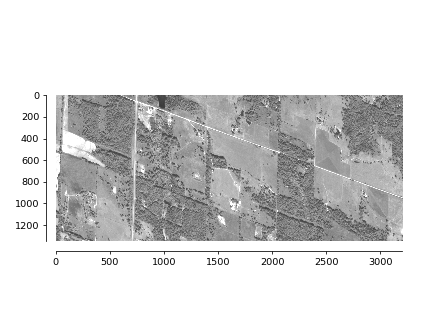

In [87]:
display_RSO(readGTIFF(imgs[1]));

<IPython.core.display.Javascript object>


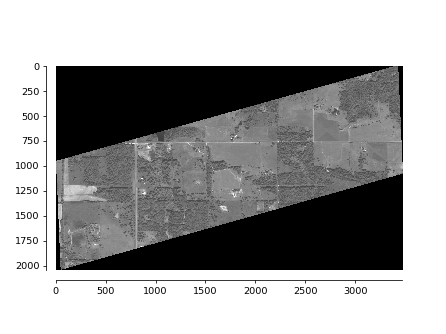

In [84]:
display_RSO(readGTIFF('tmp/sarimage_longlat.tif'));

In [99]:
crop_with_gdalwarp("tmp/sarimage_longlat.tif", "tmp/test_gdalwarp.tif", 'tmp/geoson_path.txt')

In [100]:
plt.figure()
plt.imshow(readGTIFF('tmp/test_gdalwarp.tif'))
plt.show()

<IPython.core.display.Javascript object>

TypeError: Invalid dimensions for image data

<IPython.core.display.Javascript object>


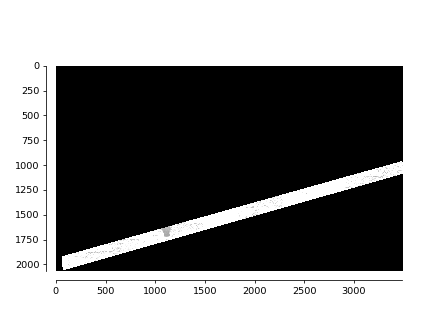

In [101]:
display_RSO(readGTIFF('tmp/test_gdalwarp.tif'));

In [102]:
m = clickablemap()
m.add_GeoJSON(cpy_geo)

# m.center = footprint[0]['coordinates'][0][0][::-1]
m.center = cpy_geo['coordinates'][0][0][::-1]
display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[36.1075931445452, -96.7811354160731], controls=(DrawControl(circle={'shapeOptions': {'color': '#0000FF'}}, layer=FeatureGroup(), polygon={'shapeOptions': {'color': '#0000FF'}}, polyline={'shapeOptions': {'color': '#0000FF'}}, rectangle={'shapeOptions': {'color': '#0000FF'}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), GeoJSON(data={'type': 'Polygon', 'coordinates': [[[-96.7811354160731, 36.1075931445452], [-96.7386751511896, 36.1195815632118], [-96.7380768798033, 36.1061109605398], [-96.7805680115124, 36.0940606921384], [-96.7811354160731, 36.1075931445452]]]})), layout=Layout(height='500px', width='100%'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], scroll_wheel_zoom=True, zoom=13)